In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# ***Random Number Generator***

Text(0.5, 1.0, 'ran')

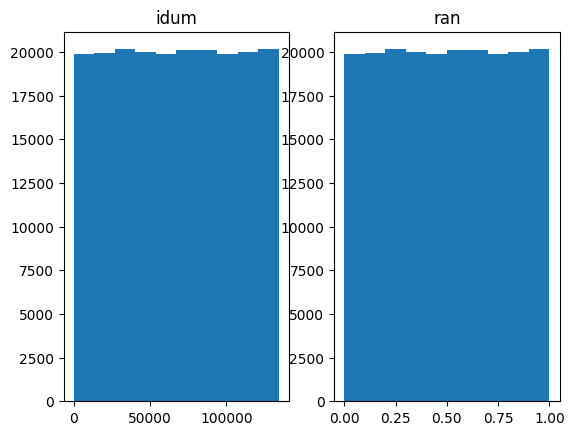

In [2]:
m = 134456
n =8121
k=28411
idum =1000
sample_idum = np.array([])
sample_ran = np.array([])
sample_iteration = np.array([])
for iteration in range(200000):
  idum = (idum*n+k)%m
  ran = idum/float(m)
  sample_idum = np.append(sample_idum,idum)
  sample_ran = np.append(sample_ran,ran)
  sample_iteration = np.append(sample_iteration,iteration)
plt.subplot(1,2,1)
plt.hist(sample_idum)
plt.title("idum")
plt.subplot(1,2,2)
plt.hist(sample_ran)
plt.title("ran")

In [3]:
import pandas as pd
data = {
    "idum": sample_idum,
    "ran": sample_ran,
    "iteration":sample_iteration
        }

sample = pd.DataFrame(data)
sample




,idum,ran,iteration
0,82051.0,0.610244,0.0
1,646.0,0.004805,1.0
2,30793.0,0.229019,2.0
3,10204.0,0.075891,3.0
4,70199.0,0.522096,4.0
...,...,...,...
199995,85100.0,0.632921,199995.0
199996,21671.0,0.161175,199996.0
199997,15698.0,0.116752,199997.0
199998,47581.0,0.353878,199998.0


*all numbers between 0 and m-1*

In [4]:
sample.sort_values(by=['idum'])


,idum,ran,iteration
94607,0.0,0.000000,94607.0
138738,1.0,0.000007,138738.0
4282,1.0,0.000007,4282.0
35309,2.0,0.000015,35309.0
169765,2.0,0.000015,169765.0
...,...,...,...
176299,134452.0,0.999970,176299.0
76846,134453.0,0.999978,76846.0
135985,134454.0,0.999985,135985.0
1529,134454.0,0.999985,1529.0


In [5]:
random.seed(1000)
Upsilon = random.uniform(0.0,1.0)
Upsilon

0.7773566427005639

# ***Rejection Sampling***

*Metropolis acceptance rate*

$p(a\implies b) = min(1,\frac{\pi(a)}{\pi(b)})$

*if $\frac{\pi(a)}{\pi(b)}$ between 0 and 1,*

*0 to $\frac{\pi(a)}{\pi(b)} \implies$ accepted*

*$\frac{\pi(a)}{\pi(b)}$ to 1 $\implies$ rejected*

*if $\frac{\pi(a)}{\pi(b)}$ greater than 1,*

*all of them are accepted*


**Metropolis Algorithm to Sample Gaussian Distribution**

$$
 \pi(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-1}{2}{(\frac{x-\mu}{\sigma})}^{2}}
$$


(array([  4.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   1.,   0.,   0.,
          0.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,
          0.,   1.,   0.,   4.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          2.,   0.,   2.,   4.,   2.,   1.,   2.,   0.,   0.,   2.,   1.,
          3.,   6.,   0.,   1.,   3.,   1.,   3.,   4.,   0.,   5.,   2.,
          0.,   8.,   4.,   1.,   6.,   2.,   2.,   0.,   7.,   1.,   2.,
          6.,   1.,   6.,   2.,   5.,   4.,   5.,   1.,   4.,   6.,   0.,
          3.,   5.,   7.,   8.,   6.,   8.,   5.,   5.,   3.,   7.,   5.,
          3.,   6.,   3.,   8.,   5., 

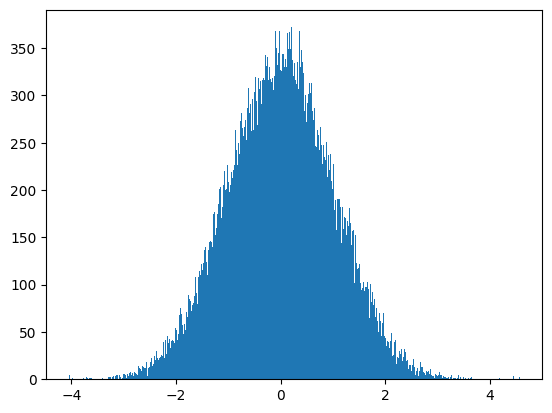

In [6]:
import random,math
x = 0.0
delta = 0.5
sample = np.array([])
for i in range(100000):
  x_new = x + random.uniform(-delta,delta)
  acceptance_rate = math.exp(-x_new**2 / 2.0)/math.exp(-x**2/2)
  if random.uniform(0.0,1.0)< acceptance_rate:
    x = x_new
  sample = np.append(sample,x)
sample
plt.hist(sample,bins=1000)

In [7]:
np.mean(sample),np.std(sample)

(0.005322212049244861, 1.0132966890171453)

**Rejection Function of Gaussian Distribution**

$$
 \pi(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-1}{2}{{x}}^{2}}
$$


(array([  2.,  10.,  38., 122., 216., 260., 214., 104.,  28.,   6.]),
 array([-3.81710919, -3.11900638, -2.42090357, -1.72280076, -1.02469795,
        -0.32659514,  0.37150767,  1.06961048,  1.76771329,  2.4658161 ,
         3.16391891]),
 <BarContainer object of 10 artists>)

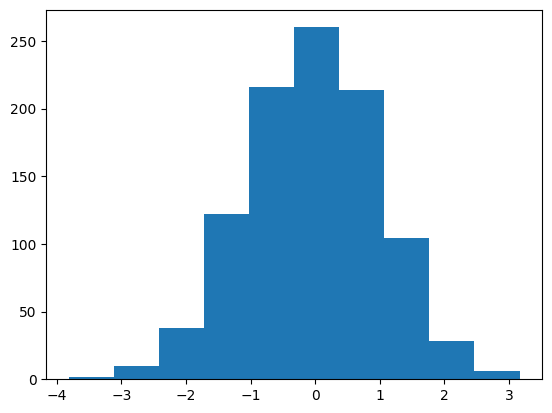

In [8]:
import random,math
y_max = 1/math.sqrt(2*math.pi)
x_cut = 5.0
n_data = 1000
n_accept = 0
sample = np.array([])
while n_accept < n_data:
  y = random.uniform(0.0,y_max)
  x = random.uniform(-x_cut,x_cut)
  acceptance_rate = math.exp(-x**2 / 2.0)/math.sqrt(2*math.pi)
  if y < acceptance_rate:
    n_accept += 1
    sample = np.append(sample,x)

plt.hist(sample)


**Rejection of Random Function**

$$
 \pi(x)=\frac{1}{2\sqrt{x}}
$$

(array([3107., 1355., 1045.,  821.,  716.,  679.,  632.,  575.,  575.,
         495.]),
 array([1.36384189e-06, 9.99778251e-02, 1.99954286e-01, 2.99930748e-01,
        3.99907209e-01, 4.99883670e-01, 5.99860131e-01, 6.99836592e-01,
        7.99813054e-01, 8.99789515e-01, 9.99765976e-01]),
 <BarContainer object of 10 artists>)

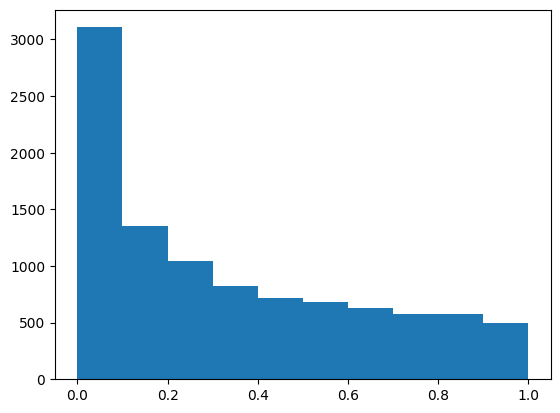

In [9]:
import random,math
y_max = 100.0
x_cut = 1.0
n_data = 10000
n_accept = 0
sample = np.array([])
while n_accept < n_data:
  y = random.uniform(0.0,y_max)
  x = random.uniform(0.0,x_cut)
  acceptance_rate = 1/(2*math.sqrt(x))
  if y < acceptance_rate:
    n_accept += 1
    sample = np.append(sample,x)
plt.hist(sample)

**Markov Chain Algorithm**

In [10]:
import random,math
x = 0.2
y_max = 0
delta = 0.5

x_sample = np.array([])
y_sample = np.array([])
k_sample = np.array([])

sample = np.array([])
for k in range(10000):
  x_new = x + random.uniform(-delta,delta)
  if x_new > 0.0 and x_new < 1.0:
    acceptance_rate = math.sqrt(x)/math.sqrt(x_new)
    if random.uniform(0.0,1.0)< acceptance_rate:
      x = x_new
  if 1/(2*math.sqrt(x)) > y_max:
    y_max = 1/(2*math.sqrt(x))
  x_sample = np.append(x_sample,x)
  y_sample = np.append(y_sample,y_max)
  k_sample = np.append(k_sample,k)



In [11]:
data = {
    "x": x_sample,
    "y": y_sample,
    "k": k_sample
        }

sample = pd.DataFrame(data)
sample

,x,y,k
0,0.003910,7.995884,0.0
1,0.003910,7.995884,1.0
2,0.003910,7.995884,2.0
3,0.003910,7.995884,3.0
4,0.003910,7.995884,4.0
...,...,...,...
9995,0.000679,62.149772,9995.0
9996,0.000679,62.149772,9996.0
9997,0.026891,62.149772,9997.0
9998,0.026891,62.149772,9998.0


array([[<Axes: title={'center': 'x'}>]], dtype=object)

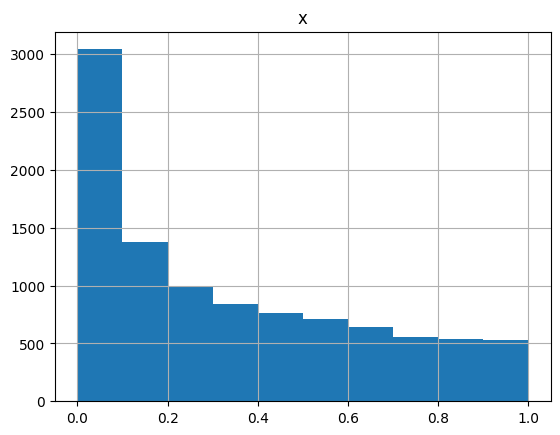

In [12]:
sample.hist("x")

# ***Discrete Sampling***

**Tower Sampling**

In [13]:
import random

def bisection_research(eta, w_cumulative):
  k_min = 0
  k_max = len(w_cumulative)
  while True:
    k = int((k_min + k_max)/2)
    if w_cumulative[k] < eta:
      k_min = k
    elif w_cumulative[k-1] > eta:
      k_max = k
    else:
      return k-1

def tower_sample(weights):
  sum_weights = sum(weights)
  w_cumulative = [0.0]
  for l in range(len(weights)):
    w_cumulative.append(w_cumulative[l] + weights[l])
  eta = random.random()*sum_weights
  sampled_choice = bisection_research(eta,w_cumulative)
  return sampled_choice

weights = [0.4,0.3,0.8,0.1,0.2]
n_sample = 20

for sample in range(n_sample):
  print(tower_sample(weights))


1
0
2
2
0
0
4
2
2
2
2
2
0
4
2
3
2
0
1
4


**Walker Algorithm**

[(0.05, 4, 3), (0.09999999999999998, 3, 1), (0.1, 2, 1), (0.17999999999999997, 1, 0), (0.19999999999999998, 0, 0)]


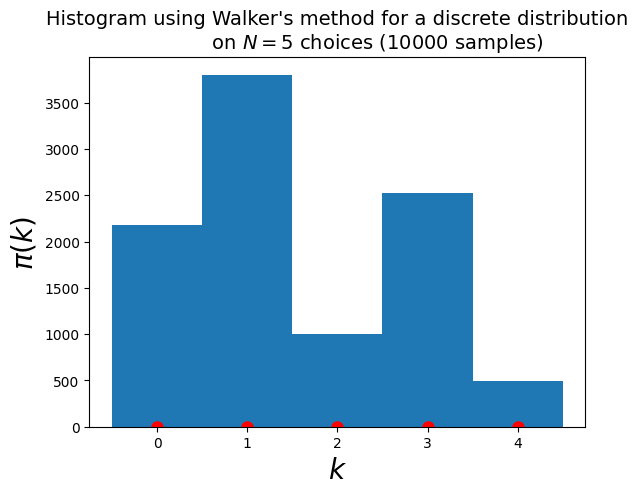

In [14]:
import random, pylab

N = 5
pi = [[1.1 / 5.0, 0], [1.9 / 5.0, 1], [0.5 / 5.0, 2], [1.25 / 5.0, 3], [0.25 / 5.0, 4]]
x_val = [a[1] for a in pi]
y_val = [a[0] for a in pi]
pi_mean = sum(y_val) / float(N)
long_s = []
short_s = []
for p in pi:
    if p[0] > pi_mean:
        long_s.append(p)
    else:
        short_s.append(p)
table = []
for k in range(N - 1):
    e_plus = long_s.pop()
    e_minus = short_s.pop()
    table.append((e_minus[0], e_minus[1], e_plus[1]))
    e_plus[0] = e_plus[0] - (pi_mean - e_minus[0])
    if e_plus[0] < pi_mean:
        short_s.append(e_plus)
    else:
        long_s.append(e_plus)
if long_s != []:
    table.append((long_s[0][0], long_s[0][1], long_s[0][1]))
else:
    table.append((short_s[0][0], short_s[0][1], short_s[0][1]))
print(table)
samples = []
n_samples = 10000
for k in range(n_samples):
    Upsilon = random.uniform(0.0, pi_mean)
    i = random.randint(0, N-1)
    if Upsilon < table[i][0]:
        samples.append(table[i][1])
    else: samples.append(table[i][2])

pylab.figure()
pylab.hist(samples, bins=N, range=(-0.5, N-0.5))
pylab.plot(x_val, y_val,'ro', ms=8)
pylab.title("Histogram using Walker's method for a discrete distribution\n\
             on $N=$"+str(N)+" choices ("+str(n_samples)+" samples)",fontsize=14)
pylab.xlabel('$k$',fontsize=20)
pylab.ylabel('$\pi(k)$',fontsize=20)
pylab.show()

**Continuous Sampling**

$ \phi(x) = \int _ {-\infty}^{x} \pi(x\prime)\;dx\prime  $

*gaussian should be from $-\infty$ to $+\infty$,so we have an error function*

$
 \pi(x)=\frac{1}{\sqrt{2\pi}}e^{\frac{-1}{2}{{x}}^{2}}
$

$\phi(x)= \frac{1}{2}[1 + erf(\frac{x}{\sqrt2})]$


$erf(x)= \frac{2}{\sqrt\pi}\int _ {0}^{x} e^{-x\prime^2}\;dx\prime $

$ x = \sqrt2 erf^{-1}(2\phi-1)$

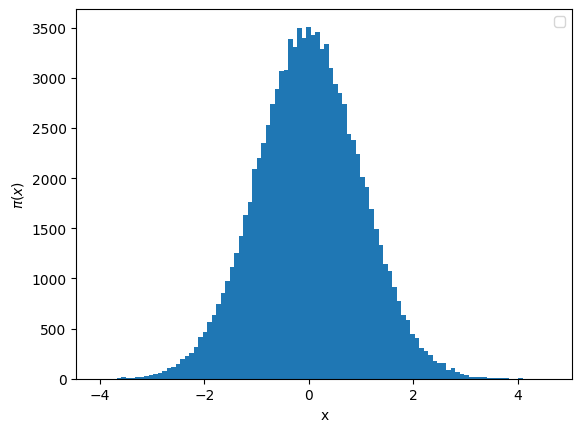

In [15]:
import scipy.special, random, math

n_trials = 100000
sample = np.array([])
for trial in range(n_trials):
    Upsilon = random.uniform(0.0, 1.0)
    x = math.sqrt(2.0) * scipy.special.erfinv(2.0 * Upsilon - 1.0)
    sample = np.append(sample,x)

plt.hist(sample,bins=100)
plt.xlabel("x")
plt.ylabel("$\pi(x)$")
plt.legend()

**Gama Transformation**

$
 \pi(x)=contstant \times x^{\gamma}
$

for $0<x≤1$


for $
 \pi(x)=\frac{1}{2\sqrt{x}}
 , γ=-0.5 $

$ \phi(x) = \int _ {0}^{x} \pi(x\prime)\;dx\prime  $

$ \phi(x) = x^{\gamma +1}  $

$ \Upsilon = x^{\gamma +1}  \implies x = \Upsilon^\frac{1}{\gamma +1}$

$ \Upsilon = random.uniform(0.0,1.0)$



(array([3150., 1331., 1028.,  858.,  751.,  626.,  610.,  583.,  530.,
         533.]),
 array([4.38430533e-08, 9.99760457e-02, 1.99952048e-01, 2.99928049e-01,
        3.99904051e-01, 4.99880053e-01, 5.99856055e-01, 6.99832057e-01,
        7.99808059e-01, 8.99784061e-01, 9.99760062e-01]),
 <BarContainer object of 10 artists>)

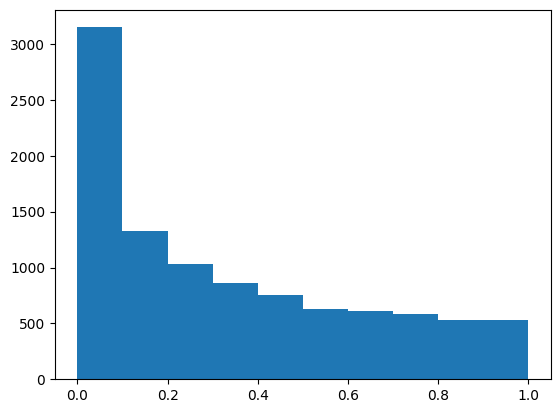

In [19]:
import random
gamma = -0.5
n_trials = 10000
sample = np.array([])
for trial in range(n_trials):
  x = (random.uniform(0.0,1.0))**(1/(gamma+1))
  sample = np.append(sample,x)

plt.hist(sample)
